In [3]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = "large_max_k"

In [8]:
def load_scores(data_set):
    
    with open(f"{data_dir}/cikm2024_{data_set}.txt") as f:
        lines = f.readlines()

    pivot_scores = []
    vote_scores = []
    pls_scores = []
    vls_scores = []

    for i in range(len(lines)):
        cur_line = lines[i]
        
        if "Pivot scores" in cur_line:
            next_line = lines[i + 1]
            vals = next_line.split()
            pivot_scores.append(list(map(int, vals)))

        if "Vote scores" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            vote_scores.append(list(map(int, vals)))
            
        if "PLS scores" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            pls_scores.append(list(map(int, vals)))
            
        if "VLS scores" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            vls_scores.append(list(map(int, vals)))            

    return pivot_scores, vote_scores, pls_scores, vls_scores 


def load_times(data_set):
    
    with open(f"{data_dir}/cikm2024_{data_set}.txt") as f:
        lines = f.readlines()

    pivot_times = []
    vote_times = []
    pls_times = []
    vls_times = []

    for i in range(len(lines)):
        cur_line = lines[i]
        
        if "Pivot times" in cur_line:
            next_line = lines[i + 1]
            vals = next_line.split()
            pivot_times.append(list(map(float, vals)))

        if "Vote times" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            vote_times.append(list(map(float, vals)))
            
        if "PLS times" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            pls_times.append(list(map(float, vals)))
            
        if "VLS times" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            vls_times.append(list(map(float, vals)))            

    return pivot_times, vote_times, pls_times, vls_times 

In [47]:
### GATHER RESULTS

def plot_scores(data_set, title):
    """
    Cluster sizes range from 10 to 100    
    """

    pivot_scores, vote_scores, pls_scores, vls_scores = load_scores(data_set)

    x_vals = list(range(10, 101, 10))

    # PIVOT IS BASE LINE, OTHERS ARE FRACTIONS OF PIVOT AVERAGE ?
    
    
    pivot_means = [np.mean(pivot_scores[i]) for i in range(len(x_vals))]
    
    # pivot_adjust = [np.mean(pivot_scores[i]) / ilp_scores[i] for i in range(len(x_vals))]
    vote_adjust = [np.mean(vote_scores[i]) / pivot_means[i] for i in range(len(x_vals))]
    pls_adjust = [np.mean(pls_scores[i]) / pivot_means[i] for i in range(len(x_vals))]
    vls_adjust = [np.mean(vls_scores[i]) / pivot_means[i] for i in range(len(x_vals))]

    # ERROR BAR

    # pivot_errs = [np.std(pivot_scores[i])  / ilp_scores[i] for i in range(len(x_vals))]
    vote_errs = [np.std(vote_scores[i])  / pivot_means[i] for i in range(len(x_vals))]
    pls_errs = [np.std(pls_scores[i])  / pivot_means[i] for i in range(len(x_vals))]
    vls_errs = [np.std(vls_scores[i])  / pivot_means[i] for i in range(len(x_vals))]
    
    # print(vote_errs)
      
    # print(pivot_adjust)
    # print(vote_adjust)
    
    # plt.scatter(x_vals, pivot_adjust, label = "Pivot")
    # plt.scatter(x_vals, vote_adjust, label = "Vote")
    
    # pivot_x = [x_vals[i] - 0.15 for i in range(len(x_vals))]
    #vote_x = [x_vals[i] - 0.05 for i in range(len(x_vals))]
    pls_x = [x_vals[i] - 0.5 for i in range(len(x_vals))]
    vls_x = [x_vals[i] + 0.5 for i in range(len(x_vals))]

    # plt.errorbar(pivot_x, pivot_adjust, pivot_errs, fmt="o", label="Pivot", alpha=0.75)
    plt.errorbar(x_vals, vote_adjust, vote_errs, fmt="s", c="C1", label="Vote", alpha=0.75)
    plt.errorbar(pls_x, pls_adjust, pls_errs, fmt="^", c="C2", label="PLS", alpha=0.75)
    plt.errorbar(vls_x, vls_adjust, vls_errs, fmt="x", c="C3", label="VLS", alpha=0.75)

    plt.xlabel("Max Cluster Size")
    plt.ylabel("Ratio of Objective to Pivot Mean")
    plt.title(title)
    plt.legend()
    
    plt.savefig(f"{data_dir}/{data_set}_rel.png")
    plt.show()


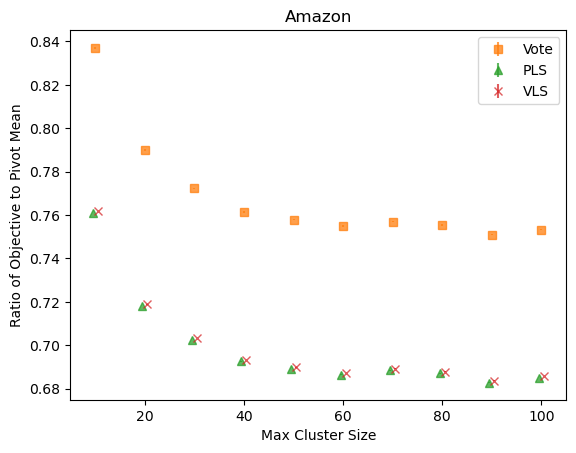

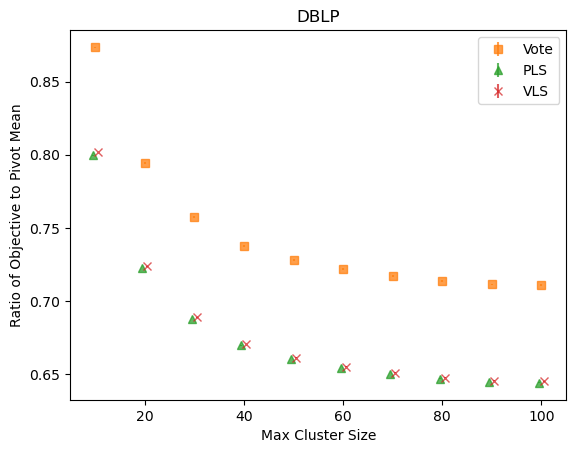

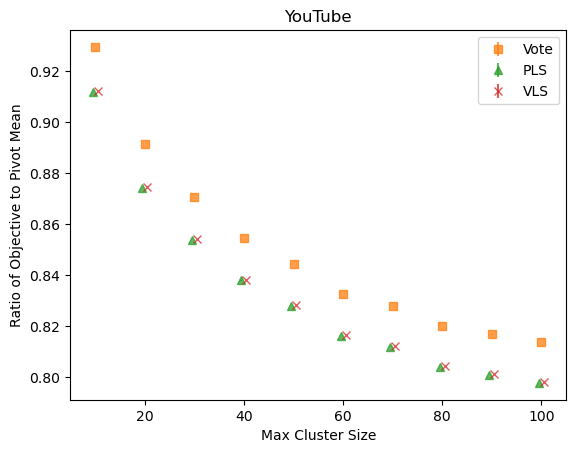

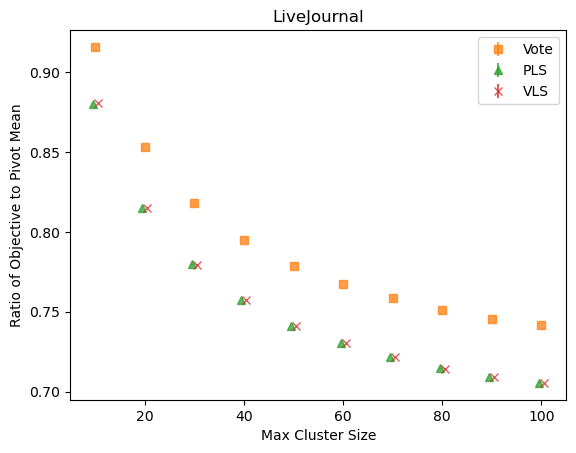

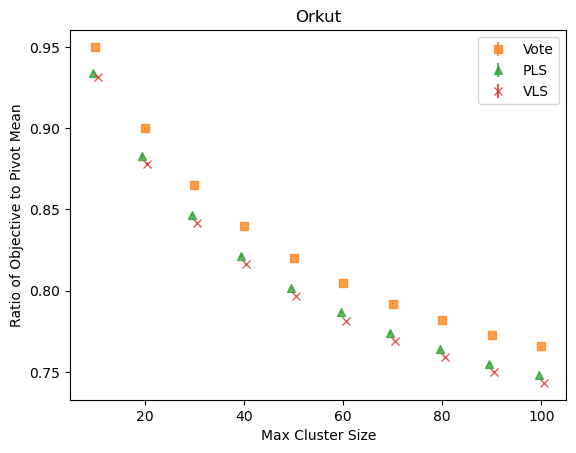

In [48]:
datasets = ["amazon", "dblp", "youtube", "livejournal", "orkut"]
titles = ["Amazon", "DBLP", "YouTube", "LiveJournal", "Orkut"]

for i in range(5):
    plot_scores(datasets[i], titles[i])

In [55]:
### GATHER RESULTS

def plot_times(data_set, title):
    """
    Cluster sizes range from 10 to 100    
    """

    pivot_times, vote_times, pls_times, vls_times = load_times(data_set)

    x_vals = list(range(10, 101, 10))   
    
    pivot_means = [np.mean(pivot_times[i]) / 1000.0 for i in range(len(x_vals))]
    vote_means = [np.mean(vote_times[i]) / 1000.0 for i in range(len(x_vals))]
    pls_means = [np.mean(pls_times[i]) / 1000.0 for i in range(len(x_vals))]
    vls_means = [np.mean(vls_times[i]) / 1000.0 for i in range(len(x_vals))]

    # ERROR BAR

    pivot_errs = [np.std(pivot_times[i]) / 1000.0 for i in range(len(x_vals))]
    vote_errs = [np.std(vote_times[i]) / 1000.0 for i in range(len(x_vals))]
    pls_errs = [np.std(pls_times[i]) / 1000.0 for i in range(len(x_vals))]
    vls_errs = [np.std(vls_times[i]) / 1000.0 for i in range(len(x_vals))]
    
    # pivot_x = [x_vals[i] - 0.15 for i in range(len(x_vals))]
    #vote_x = [x_vals[i] - 0.05 for i in range(len(x_vals))]
    pls_x = [x_vals[i] - 0.5 for i in range(len(x_vals))]
    vls_x = [x_vals[i] + 0.5 for i in range(len(x_vals))]

    plt.errorbar(x_vals, pivot_means, pivot_errs, fmt="o", label="Pivot", alpha=0.75)
    plt.errorbar(x_vals, vote_means, vote_errs, fmt="s", label="Vote", alpha=0.75)
    # plt.errorbar(x_vals, pls_means, pls_means, fmt="^", label="PLS", alpha=0.75)
    # plt.errorbar(x_vals, vls_means, vls_means, fmt="x", label="VLS", alpha=0.75)

    plt.xlabel("Max Cluster Size")
    plt.ylabel("Time (s)")
    plt.title(title)
    plt.legend(loc="center right")
    
    plt.savefig(f"{data_dir}/{data_set}_time.png")
    plt.show()

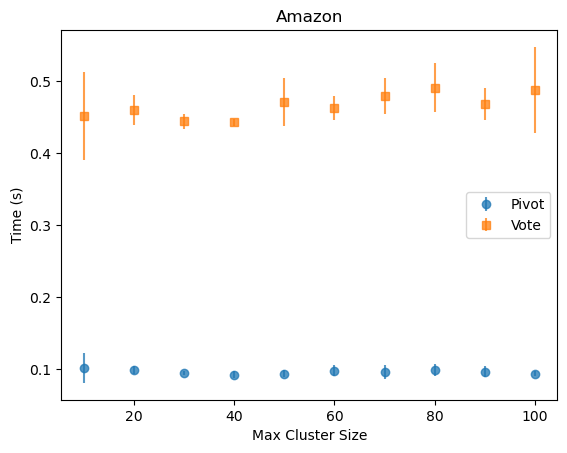

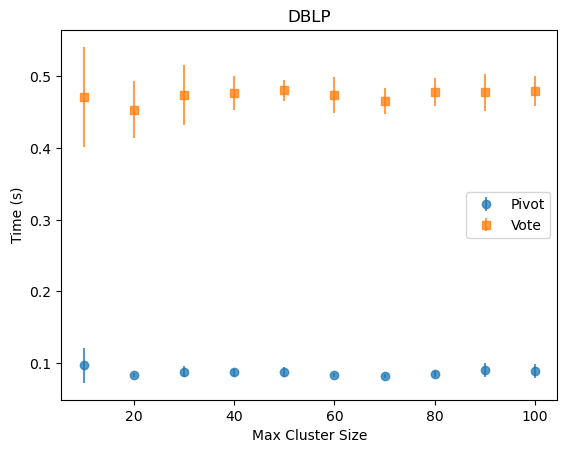

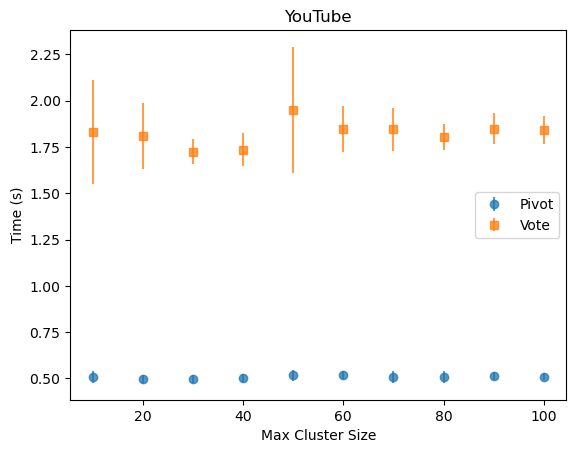

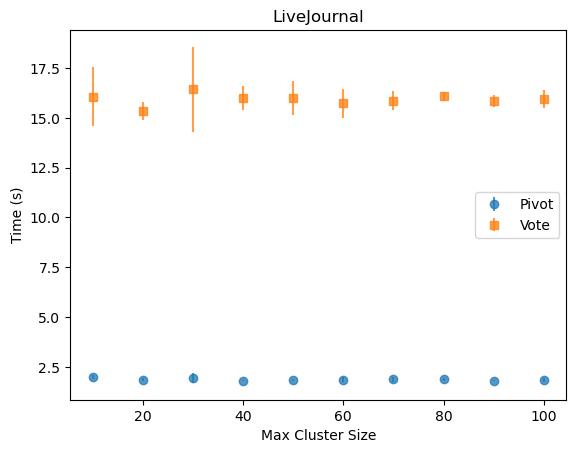

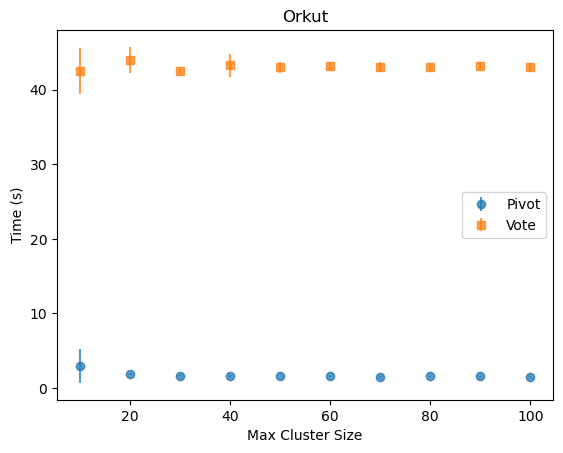

In [56]:
for i in range(5):
    plot_times(datasets[i], titles[i])

In [51]:
### GATHER RESULTS

def plot_absolute_scores(data_set, title):
    """
    Cluster sizes range from 10 to 100    
    """

    pivot_scores, vote_scores, pls_scores, vls_scores = load_scores(data_set)

    x_vals = list(range(10, 101, 10))

    # PIVOT IS BASE LINE, OTHERS ARE FRACTIONS OF PIVOT AVERAGE ?
    
    
    pivot_means = [np.mean(pivot_scores[i]) for i in range(len(x_vals))]
    vote_means = [np.mean(vote_scores[i]) for i in range(len(x_vals))]
    pls_means = [np.mean(pls_scores[i]) for i in range(len(x_vals))]
    vls_means = [np.mean(vls_scores[i]) for i in range(len(x_vals))]

    # ERROR BAR

    pivot_errs = [np.std(pivot_scores[i]) for i in range(len(x_vals))]
    vote_errs = [np.std(vote_scores[i]) for i in range(len(x_vals))]
    pls_errs = [np.std(pls_scores[i]) for i in range(len(x_vals))]
    vls_errs = [np.std(vls_scores[i]) for i in range(len(x_vals))]
    
    # print(vote_errs)
      
    # print(pivot_adjust)
    # print(vote_adjust)
    
    # plt.scatter(x_vals, pivot_adjust, label = "Pivot")
    # plt.scatter(x_vals, vote_adjust, label = "Vote")
    
    pivot_x = [x_vals[i] - 0.15 for i in range(len(x_vals))]
    vote_x = [x_vals[i] - 0.05 for i in range(len(x_vals))]
    pls_x = [x_vals[i] - 0.5 for i in range(len(x_vals))]
    vls_x = [x_vals[i] + 0.5 for i in range(len(x_vals))]

    plt.errorbar(x_vals, pivot_means, pivot_errs, fmt="o", label="Pivot", alpha=0.75)
    plt.errorbar(x_vals, vote_means, vote_errs, fmt="s", c="C1", label="Vote", alpha=0.75)
    plt.errorbar(pls_x, pls_means, pls_errs, fmt="^", c="C2", label="PLS", alpha=0.75)
    plt.errorbar(vls_x, vls_means, vls_errs, fmt="x", c="C3", label="VLS", alpha=0.75)

    plt.xlabel("Max Cluster Size")
    plt.ylabel("Objective Value")
    plt.title(title)
    plt.legend()
    
    plt.savefig(f"{data_dir}/{data_set}_abs.png")
    plt.show()


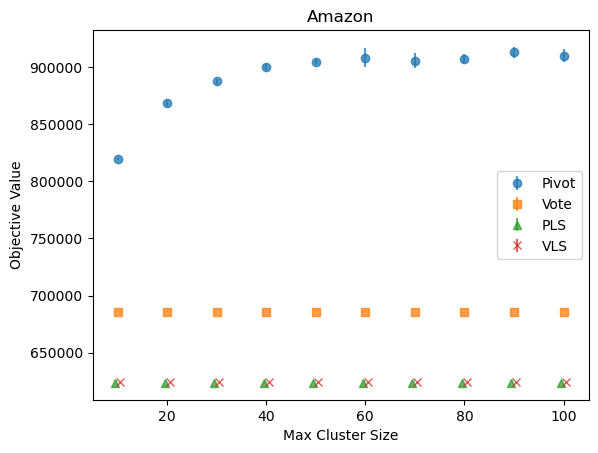

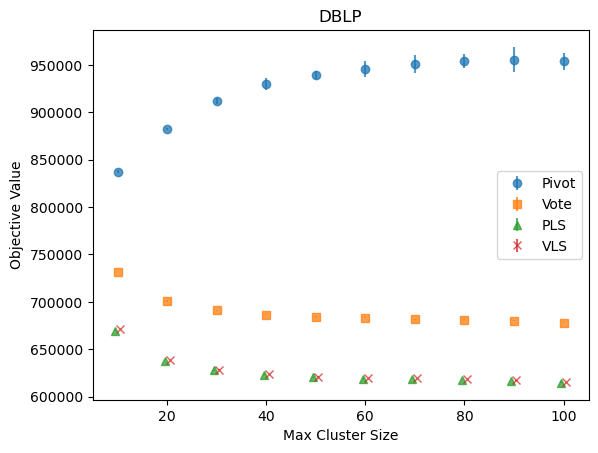

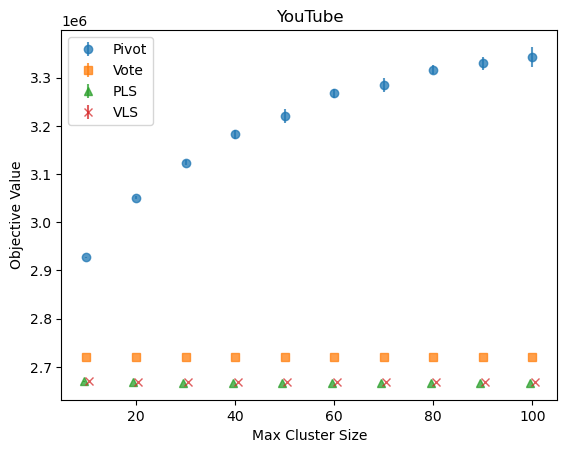

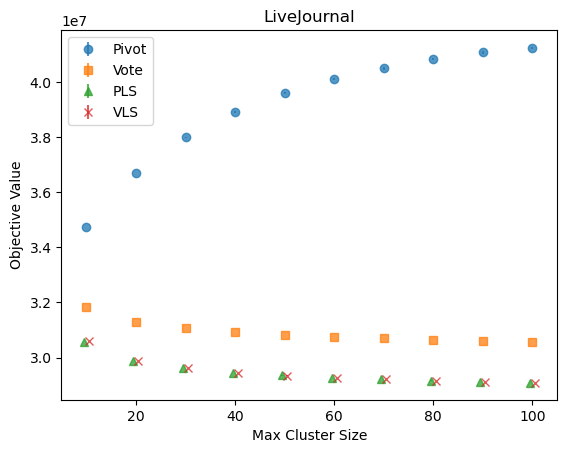

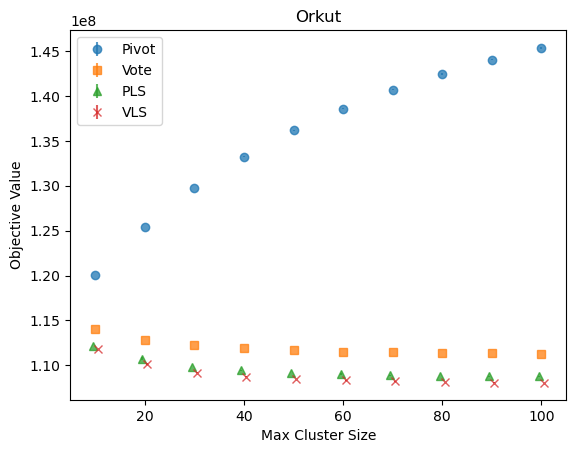

In [52]:
for i in range(5):
    plot_absolute_scores(datasets[i], titles[i])